<a href="https://colab.research.google.com/github/AsmatZahra/FeedFotward-with-Pokeman-Self-generated-dataset/blob/master/Ass2_Task2colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
%cd /content/drive/My Drive/Colab Notebooks/Deep learning assignments/assignment 2/

/content/drive/My Drive/Colab Notebooks/Deep learning assignments/assignment 2


In [88]:
!ls

'Ass2 Task2colab.ipynb'   FeedForwardFacesDataSet.h5
 Ass2Task2.py		  FeedForwardPokemanDataSet.h5
'Assignment 2.ipynb'	  PokemanDataset
 faces			 'Programming Assignment 2.pdf'


In [11]:
!pip install requests

In [0]:
#Once data is downloaded, then you need not to run it again and again
#!python Ass2Task2.py # Number of images to download can be increased in the file Ass2Task2.py
!python Ass2Task2.py --query "charmander" --output PokemanDataset/charmander

In [0]:
!python Ass2Task2.py --query "pikachu" --output PokemanDataset/pikachu

In [0]:
!python Ass2Task2.py --query "squirtle" --output PokemanDataset/squirtle

In [0]:
!python Ass2Task2.py --query "bulbasaur" --output PokemanDataset/bulbasaur

In [0]:
!python Ass2Task2.py --query "mewtwo" --output PokemanDataset/mewtwo

Resize all downloaded images to same size

In [0]:
#Run it once to resize the images and to convert  all to .png
'''
import os, sys

path = "PokemanDataset/squirtle1/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            #imResize.save('PokemanDataset/squirtle/'+os.rename(f,str(m))+ '.png', 'png', quality=90)
            imResize.save('PokemanDataset/squirtle/'+f+ '.png', 'png', quality=90)
resize()'''

In [0]:
import pathlib
train_dataset_dir = "PokemanDataset/train/"
train_dataset_dir = pathlib.Path(train_dataset_dir)

valid_dataset_dir = "PokemanDataset/validation/"
valid_dataset_dir = pathlib.Path(valid_dataset_dir)

test_dataset_dir = "PokemanDataset/test/"
test_dataset_dir = pathlib.Path(test_dataset_dir)

In [90]:
train_image_count = len(list(train_dataset_dir.glob('*/*.png')))
valid_image_count= len(list(valid_dataset_dir.glob('*/*.png')))
test_image_count= len(list(test_dataset_dir.glob('*/*.png')))
print ("Total Train Images: ",train_image_count)
print("Total Validation Images: ",valid_image_count)
print("Total Test Images",test_image_count)

Total Train Images:  722
Total Validation Images:  119
Total Test Images 97


In [91]:
import numpy as np
CLASS_NAMES = np.array([item.name for item in train_dataset_dir.glob('*') ])
print (CLASS_NAMES)

['bulbasaur' 'charmander' 'mewtwo' 'pikachu' 'squirtle']


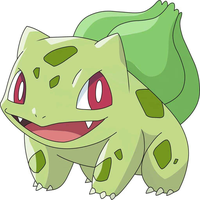

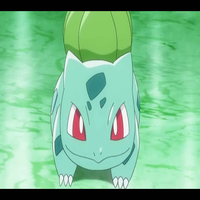

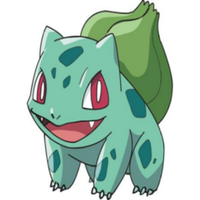

In [92]:
#Visualise few images from train directory
from PIL import Image
import IPython.display as display
train_image = list(train_dataset_dir.glob('*/*.png'))

for train_dataset_dir in train_image [:3]:
    display.display(Image.open(str(train_dataset_dir)))

In [0]:
import tensorflow as tf
#AUTOTUNE = tf.data.experimental.AUTOTUNE
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
#image_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [94]:
train_data_gen=image_generator.flow_from_directory(directory='PokemanDataset/train/',
                                                   target_size=(200,200),color_mode='grayscale',
                                                   classes=['bulbasaur', 'charmander', 'mewtwo','pikachu' ,'squirtle'],
                                                   class_mode='categorical',
                                                   batch_size=8,shuffle=True)

Found 722 images belonging to 5 classes.


In [95]:
valid_data_gen= image_generator.flow_from_directory(directory='PokemanDataset/validation/',
                                                   target_size= (200,200),
                                                   color_mode= 'grayscale',
                                                   classes=['bulbasaur', 'charmander', 'mewtwo','pikachu' ,'squirtle'],
                                                   class_mode='categorical',
                                                   batch_size=8,
                                                   shuffle= True)

Found 119 images belonging to 5 classes.


In [96]:
test_data_gen= image_generator.flow_from_directory(directory='PokemanDataset/test/',
                                                   target_size= (200,200),                                                  
                                                   color_mode= 'grayscale',
                                                   classes=['bulbasaur', 'charmander', 'mewtwo','pikachu' ,'squirtle'],
                                                   class_mode='categorical',
                                                   batch_size=8,
                                                   shuffle= True)

Found 97 images belonging to 5 classes.


In [0]:
train_imgs,train_labels = train_data_gen.next()
valid_imgs,valid_labels = valid_data_gen.next()
test_imgs,test_labels = test_data_gen.next()

In [98]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(200, 200, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 198, 198, 8)       80        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 196, 196, 16)      1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 96, 32)        4640      
_________________________________________________________________
flatten_7 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                18874432  
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [0]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics=['accuracy'])

In [100]:
BATCH_SIZE= 8
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)
print ('Steps per epoch: ',STEPS_PER_EPOCH)

Steps per epoch:  91.0


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('FeedForwardPokemanDataSet.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [102]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= STEPS_PER_EPOCH,
    epochs=100,
    callbacks=callbacks,
    validation_data= valid_data_gen,
    validation_steps= STEPS_PER_EPOCH,
    shuffle= True
)

Epoch 1/100
 4/91 [>.............................] - ETA: 36s - loss: 10.5479 - accuracy: 0.3750

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


90/91 [============================>.] - ETA: 0s - loss: 1.9733 - accuracy: 0.3165
Epoch 00001: val_loss improved from inf to 1.39113, saving model to FeedForwardPokemanDataSet.h5
91/91 [==============================] - 42s 456ms/step - loss: 1.9671 - accuracy: 0.3199 - val_loss: 1.3911 - val_accuracy: 0.4391 - lr: 0.0010
Epoch 2/100
90/91 [============================>.] - ETA: 0s - loss: 1.1366 - accuracy: 0.5546
Epoch 00002: val_loss improved from 1.39113 to 0.80108, saving model to FeedForwardPokemanDataSet.h5
91/91 [==============================] - 6s 65ms/step - loss: 1.1319 - accuracy: 0.5596 - val_loss: 0.8011 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 3/100
91/91 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.8546
Epoch 00003: val_loss improved from 0.80108 to 0.34640, saving model to FeedForwardPokemanDataSet.h5
91/91 [==============================] - 6s 65ms/step - loss: 0.4732 - accuracy: 0.8546 - val_loss: 0.3464 - val_accuracy: 0.9003 - lr: 0.00

In [103]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


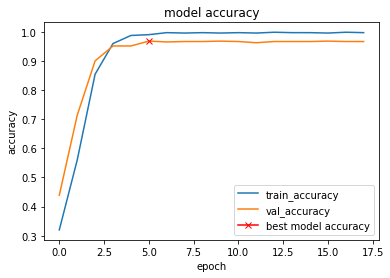

In [104]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot( np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.legend();

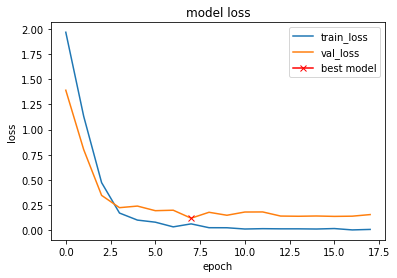

In [105]:
# summarize history for loss
plt.plot(history.history['loss'],label= "train_loss")
plt.plot(history.history['val_loss'], label= "val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

In [106]:
print('\n# Evaluate on test data')
results_test = model.evaluate(test_imgs, test_labels, batch_size=8)
print('test loss, test acc:', results_test)


# Evaluate on test data
1/1 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8750
test loss, test acc: [0.3456396758556366, 0.875]


In [115]:
print('Generate predictions for 3 samples')
predictions = model.predict(test_imgs[:3])
print('Predictions are: \n', predictions)

Generate predictions for 3 samples
Predictions are: 
 [[9.9803489e-01 2.4182738e-04 1.2392051e-03 2.6772497e-04 2.1635197e-04]
 [3.8788891e-15 3.5781655e-20 1.0000000e+00 1.7421031e-20 1.5556884e-21]
 [6.6382223e-04 6.5251422e-04 4.1734354e-04 9.9823076e-01 3.5564030e-05]]
